# Scikit-learn and Python
* We have seen Numpy had some built in capabilities for simple linear regression
but when it comes to more complex models, we will need **scikit learn**!
* Before we jump straight into machine learning with **Scikit-Learn** and Python, let's understand the philosophy behind sklearn
* Scikit-learn is a library containing many machine learning algorithms.
* It utilizes a generalized "estimator API" framework to calling the models.
* This means the way algorithms use is fitted, imported and used is uniform across the algorithm
* This allows users to easily swap the algorithms in and out and test various approaches
* Important note:
    * This uniform framework also means users can easily apply almost any algorithm effectively without truly understanding the algorithms is doing!
* Scikit learn also comes with many convenience tools, including training test split function, cross validation tools, and a variety of reporting metric functions.
* This leaves Scikit-learn as a "one-stop-shop" for many of our machine learning needs
* Philosophy of Scikit learn:
    * Scikit-learn's approaches to model building focuses on **applying models** and **performance metrics**.
    * This is more pragmatic industry style approaches rather than academic approach of describing the model and its parameters.
    * Academic users used to <i>R</i> style reporting may also want to explore the **statsmodels** python library if interested in more statistical description of model such as significant levels.
* Let quickly review the framework of Scikit-learn for the **supervised** machine learning process.
* We will quickly see how the code directly relates to the process theory!
* Recall that we will need to perform Train|Test split for supervised learning to evaluate the models.
* Also recall that there are 4 main components after a Train|Test split
* Scikit-learn easily to split this (as well as more advanced cross-validation)
* Syntax:
    * `from sklearn.model_selection import train_test_split`
    * `X_train, X_test, y_train, y_test = train_test_split(X,y)`
* Also recall that we want to compare predictions to y test labels
* The structure of the sklearn is:
    * `from sklearn.model_family import ModelAlgo` (model_family such as linear regression, ensemble model or tree methods model, Modelalgo such as linear regression)
    * `mymodel = ModelAlgo(param1, param2)` (create an instance of model, we can edit it)
    * `mymodel.fit(X_train, y_train)`(train your model)
    * `predictions = mymodel.predict(X_test)` (predict your model)
    * `from sklearn.metrics import error_metric` (understand the performance of model)
    * `performance = error_metric(y_test, predictions)` (compare y test label to your predictions and understand performance)
* This framework will be similar for any supervised machine learning algorithms



# Linear Regression with Scikit-learn
## Part one: Data Setup and Model training
* Previously, we explored "Is there a relationship between **total advertising spend** and **sales**"?
* Now we want to expand this to "What is the relationship between **each advertising channel (TV, Radio, Newspaper)** and **sales**"?

---
### Import environment and change background

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
mpl.rcParams.update({"figure.facecolor":"white"})

In [3]:
# df = pd.read_csv(filepath_or_buffer=r"/Users/nam/Desktop/datascience/08-Linear-Regression-Models/Advertising.csv")
df=pd.read_csv(r"D:\Data Science\Course-2021\08-Linear-Regression-Models\Advertising.csv")

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df['TV']

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

Text(0.5, 1.0, 'Newspaper Spend')

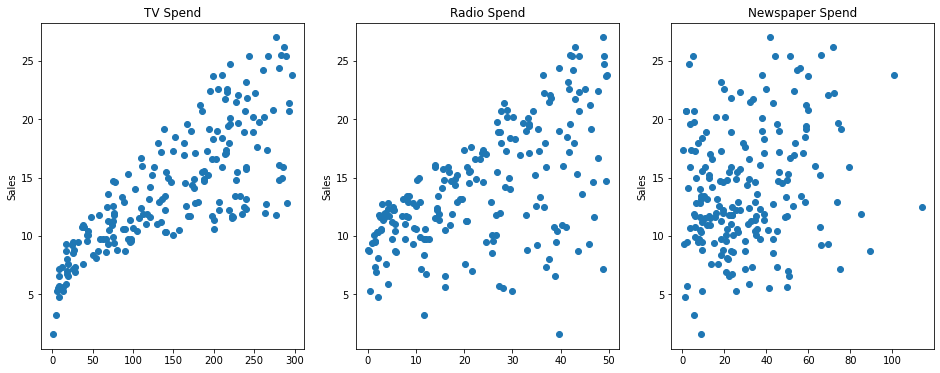

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))
axes[0].plot(df["TV"], df["sales"], "o") # Provide the o marker
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df["radio"], df["sales"], "o") # Provide the o marker
axes[1].set_ylabel("Sales")
axes[1].set_title("Radio Spend")

axes[2].plot(df["newspaper"], df["sales"], "o") # Provide the o marker
axes[2].set_ylabel("Sales")
axes[2].set_title("Newspaper Spend")

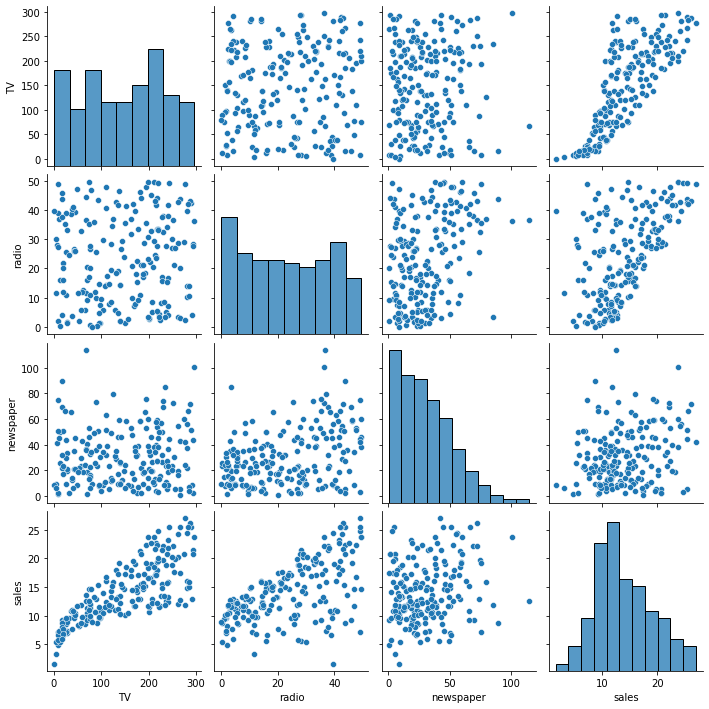

In [7]:
sns.pairplot(df)

* The TV spend and Radio spend actually clearer in the relationship between the TV, radio and sales
* The Newspaper spend seems to not clear enough

In [8]:
# the X not include the label column, features of X
X = df.drop("sales", axis=1)
# the label column
y = df['sales']

In [9]:
df['TV']

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

**Separate out the training test and test set**




In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# In order to understand the train test split => using the help function
# help(train_test_split)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

* random_state is similar as the random_seeds
    *make sure it's the same value if you intend to use multiple algorithms
    * what cycler is going to do when it calls train test split it is actually going to shuffle the array's first => to ensure the data transparency
    * in reality, the data often sorted in ascending so if training is 70% lower data and test is 30% higher data is make not clear analyze => need shuffle



In [13]:
# 200 rows
len(df)

200

In [14]:
# 140 rows
X_train

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [15]:
y_train

85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
       ... 
63     14.0
70     18.3
81     12.3
11     17.4
95     16.9
Name: sales, Length: 140, dtype: float64

In [16]:
len(X_test)

60

* The X train contains 70% of data
* The X train is similar index with y train


In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |    

* In the Python the fit_intercept or normalize is parameter but in machine learning is called hyper parameters

In [19]:
# keep all the default parameters
model = LinearRegression()

In [20]:
# fit the model
model.fit(X_train, y_train)

LinearRegression()

In [21]:
# after have model => run predict
# run the X_test and compare it to y_test
test_prediction = model.predict(X_test)

In [22]:
test_prediction

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

## Performance evaluation
### Regression Metrics
* Now that we have a fitted model that can perform predictions based on features, how do we decide if those predictions are any good?
* Fortunately we have the known test labels to compare our results to.
* Let's take a moment now to discuss evaluating Regression Models.
* Regression is a task when a model attempts to predict continuous values (unlike categorical values, which is classification)
* For example, attempting to predict the price of a house given its features is a **regression task**.
* Attempting to predict the country a house is in given its features would be a classification task
* You may have heard of some evaluation metrics like **accuracy** or **recall**
* These sort of metrics aren't useful for regression problems, we need metrics designed for *continuous* values
* Let's discuss some of the most common evaluation metrics for regression:
    * Mean absolute error (MAE)
        * This is the mean of the absolute values of errors
        * Easy to understand
            * $\frac{1}{n}\sum_{i=1}^n|y_i-\hat{y}_i|$
            * Understand how far off are my actual predictions?
        * MAE won't punish large errors  however
        * We want our error metrics to account for large errors even just a few points
    * Mean squared error
        * Larger errors are "punished" more than with MAE, making MSE more popular
        * $\frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2$
        * When you squared it, the overall effects on the average of few point large errors is really far off
        * Issue with MSE:
            * Different units than y
            * It reports units of y squared
            * Report back how far you off from your squared x not x
    * Root mean square error
        * Solve the problem of Mean square error
        * Get the root of the squared errors after everything it's done
        * This is the root of the mean of the squared errors
        * Most popular (has same units as y)
        * Similar to standard deviation instead of reporting back variance
        * $\sqrt{\frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2}$
        * Context is everything
        * A RMSE of $$10$ is fantastic for predicting the price of a house, but horrible for predicting the price of a candy bar!
        * With the RMSE = $10 that's a horrible error because you are way outside the range of typical candy bars
        * Compare your error metric to the average value of the label in your data set to try to get an intuition of its overall performance
        * Domain knowledge also plays an important role here!
        * Context of importance is also necessary to consider
            * We may create a model to predict how much medication to give, in which case small fluctuations in RMSE may actually be very significant
            * If we create a model to try to improve on existing human performance, we would need some baseline RMSE to compare to
* The metrics shown here apply to any regression task, not just Linear Regression!

In [23]:
test_prediction

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

* Evaluate the test prediction

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [25]:
df["sales"].mean()

14.0225

<AxesSubplot:xlabel='sales', ylabel='Count'>

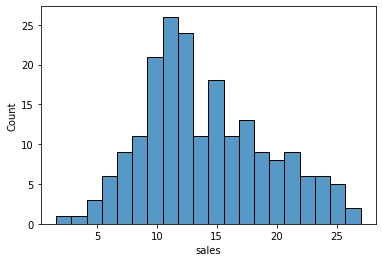

In [26]:
# see the general range for my sales values
sns.histplot(data=df, x="sales", bins=20)

* <b>Compare general range for my sales values to my mean absolute error since they are in the exact same units</b>

In [27]:
# This value compares to the mean of df["sales]
# The ratio between mean_absolute_error and mean of df["sales"].mean() is around 10%
# We need to base on historical model or the current results
# However it is doesn't take into account situations where my model could be really far off a few points
mean_absolute_error(y_test, test_prediction)

1.213745773614481

In [28]:
# Cannot directly compare to the mean because this is now in squared terms of mean square error
mean_squared_error(y_test, test_prediction)

2.2987166978863782

In [29]:
# Solve it by using the root of mean square error
np.sqrt(mean_squared_error(y_test, test_prediction))

1.516151937599388

### We need to base on historical model or the current results
* `mean_absolute_error` doesn't take into account situations where my model could be really far off a few points
* `mean_squared_error` cannot directly compare to the mean because this is now in squared terms of mean square error
* In order to solve the correct the data, we need to consider both root of mean_square_error(RMSE) and mean_absolute_error
* Consider the `mean_absolute_error` to ensure on the average the model is good
* Consider the root of `mean_squared_error` to make sure I'm not super far off for just a few data points

---
## Residual plots
* Often for Linear Regression it is  a good idea to separately evaluate residuals $(y-\hat{y})$ and not just calculate performance metrics (e.g. RMSE)
* Recall Anscombe's quartet - Clearly linear Regression is not suitable -> but we only could do this by using the one $x$ feature
* But how can we tell if we're dealing with more than one $x$ features?
* We can not see this discrepancy of fit visually if we have multiple features!
* **What we could do is plot residual error against true y values**

* Consider the appropriate data:

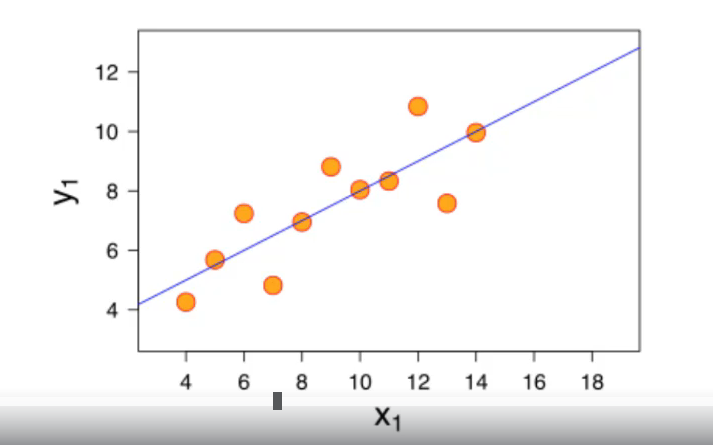

In [30]:
from PIL import Image
Image.open(r"D:\Data Science\Course-2021\08-Linear-Regression-Models\1.png")

* The residual errors should be random and close to a normal distribution
* Almost the residual should hit the zero => when distributed, are close to a mean of zero because we want them to centerd around zero since zero indicates a perfect fit
* The distributed will move positive when we overshoot and move negative when we undershoot

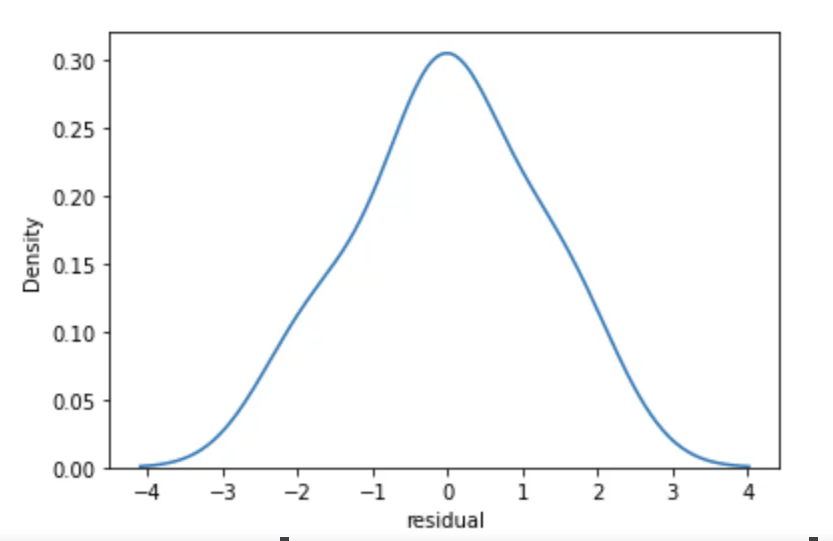

In [31]:
from PIL import Image
Image.open(r"D:\Data Science\Course-2021\08-Linear-Regression-Models\2.png")


* The residual plot shows residual error vs true y value
* There should be no clear line or curve (everything is random)

* What about non valid data sets




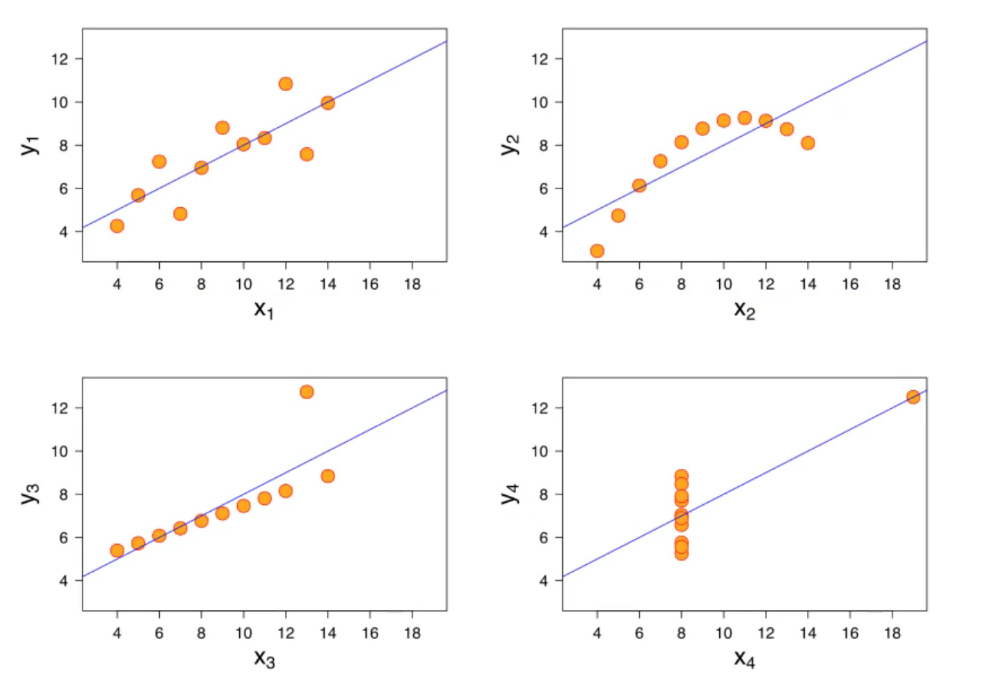

In [32]:
from PIL import Image
Image.open(r"D:\Data Science\Course-2021\08-Linear-Regression-Models\3.png")

* For the second right upper plot - show a curve plot

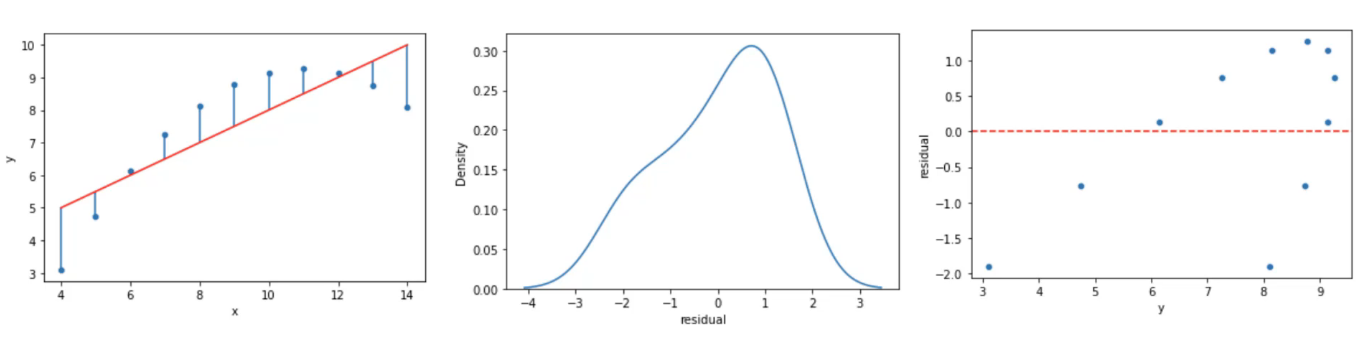

In [33]:
from PIL import Image
Image.open(r"D:\Data Science\Course-2021\08-Linear-Regression-Models\4.png")

* This not show exactly normal distributed
* Residual plot showing a clear pattern indicating Linear Regression no valid! (the 3rd plot)

* Another non-valid choice
* It almost looks like some sort of classification problem where the values are either 8 or 19

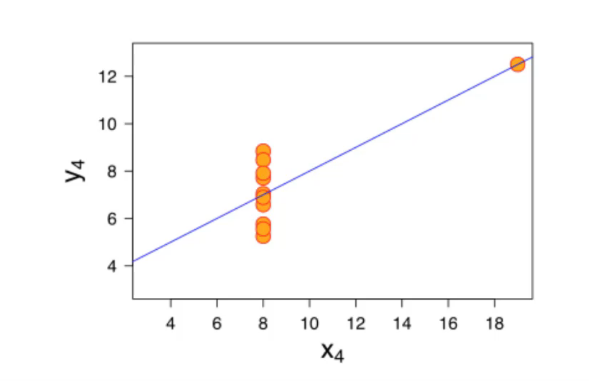

In [34]:
from PIL import Image
Image.open(r"D:\Data Science\Course-2021\08-Linear-Regression-Models\5.png")


* When you see on the distributed and linear regression, there are no problems with this data
* However when look at the residual plot. Residual plot showing a clear pattern, indicating Linear Regression no valid!

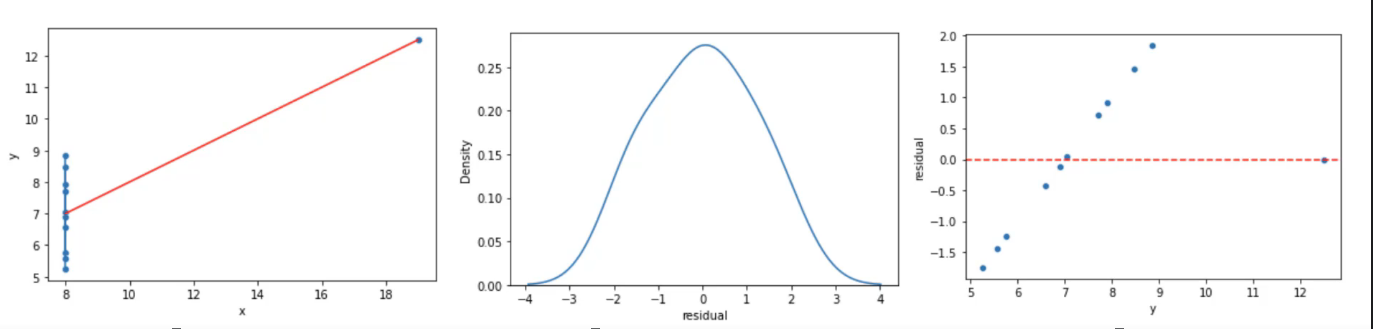

In [35]:

from PIL import Image
Image.open(r"D:\Data Science\Course-2021\08-Linear-Regression-Models\6.png")


#### Use the residual plot to make sure that the underlying data set is a valid choice

In [36]:
# all the error that our model have
test_residuals = y_test - test_prediction

In [37]:
test_residuals

37    -1.041313
109    0.189374
31     0.451111
89    -0.308198
66     0.327143
119   -0.412483
54    -0.089925
74    -0.299540
145    0.524155
142    0.878058
148   -1.505032
112    0.207650
174   -2.225411
55     2.412060
141    0.775434
149    0.118016
25    -3.552290
34     1.810863
170    0.843850
39     1.096888
172   -0.192152
153    0.757859
175    2.313681
61     1.378009
65     1.320379
50    -1.252073
42    -0.769259
129    1.647714
179    0.176840
2     -3.207197
12    -1.577578
133    0.355399
90     1.129731
22    -1.107800
41    -0.214921
32     1.832357
125    1.346067
196    1.421653
158   -3.281056
180   -0.135911
16    -0.510026
186    0.528079
144    1.185301
121   -1.045720
80     0.232893
18     1.216320
78    -3.698066
48    -1.453889
4     -0.339423
15     1.585066
1     -2.097274
43    -1.066159
102   -2.762851
164    0.754630
9     -1.962615
155   -2.308703
36     2.105349
190   -1.824097
33    -1.374000
45    -0.287857
Name: sales, dtype: float64

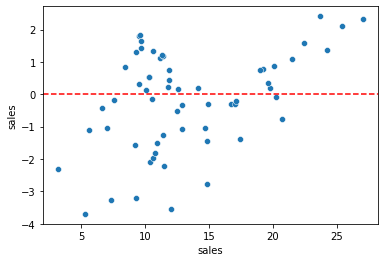

In [38]:
# the data should be looked like random not clear line or curve
sns.scatterplot(x=y_test, y=test_residuals)
# plot out the horizontal line on this - using axhline (along x horizontal line)
plt.axhline(y=0, color="r", ls="--")

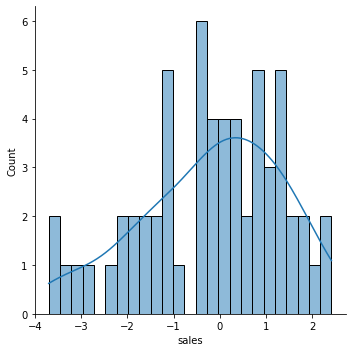

In [39]:
# it seems normal distribute with the mean closes to 0
sns.displot(test_residuals, bins=25, kde=True)

* The normal probability plot that actually allows you to compare what a perfectly normally distributed dataset would look like against your actual values

In [40]:
import scipy as sp
from scipy import stats

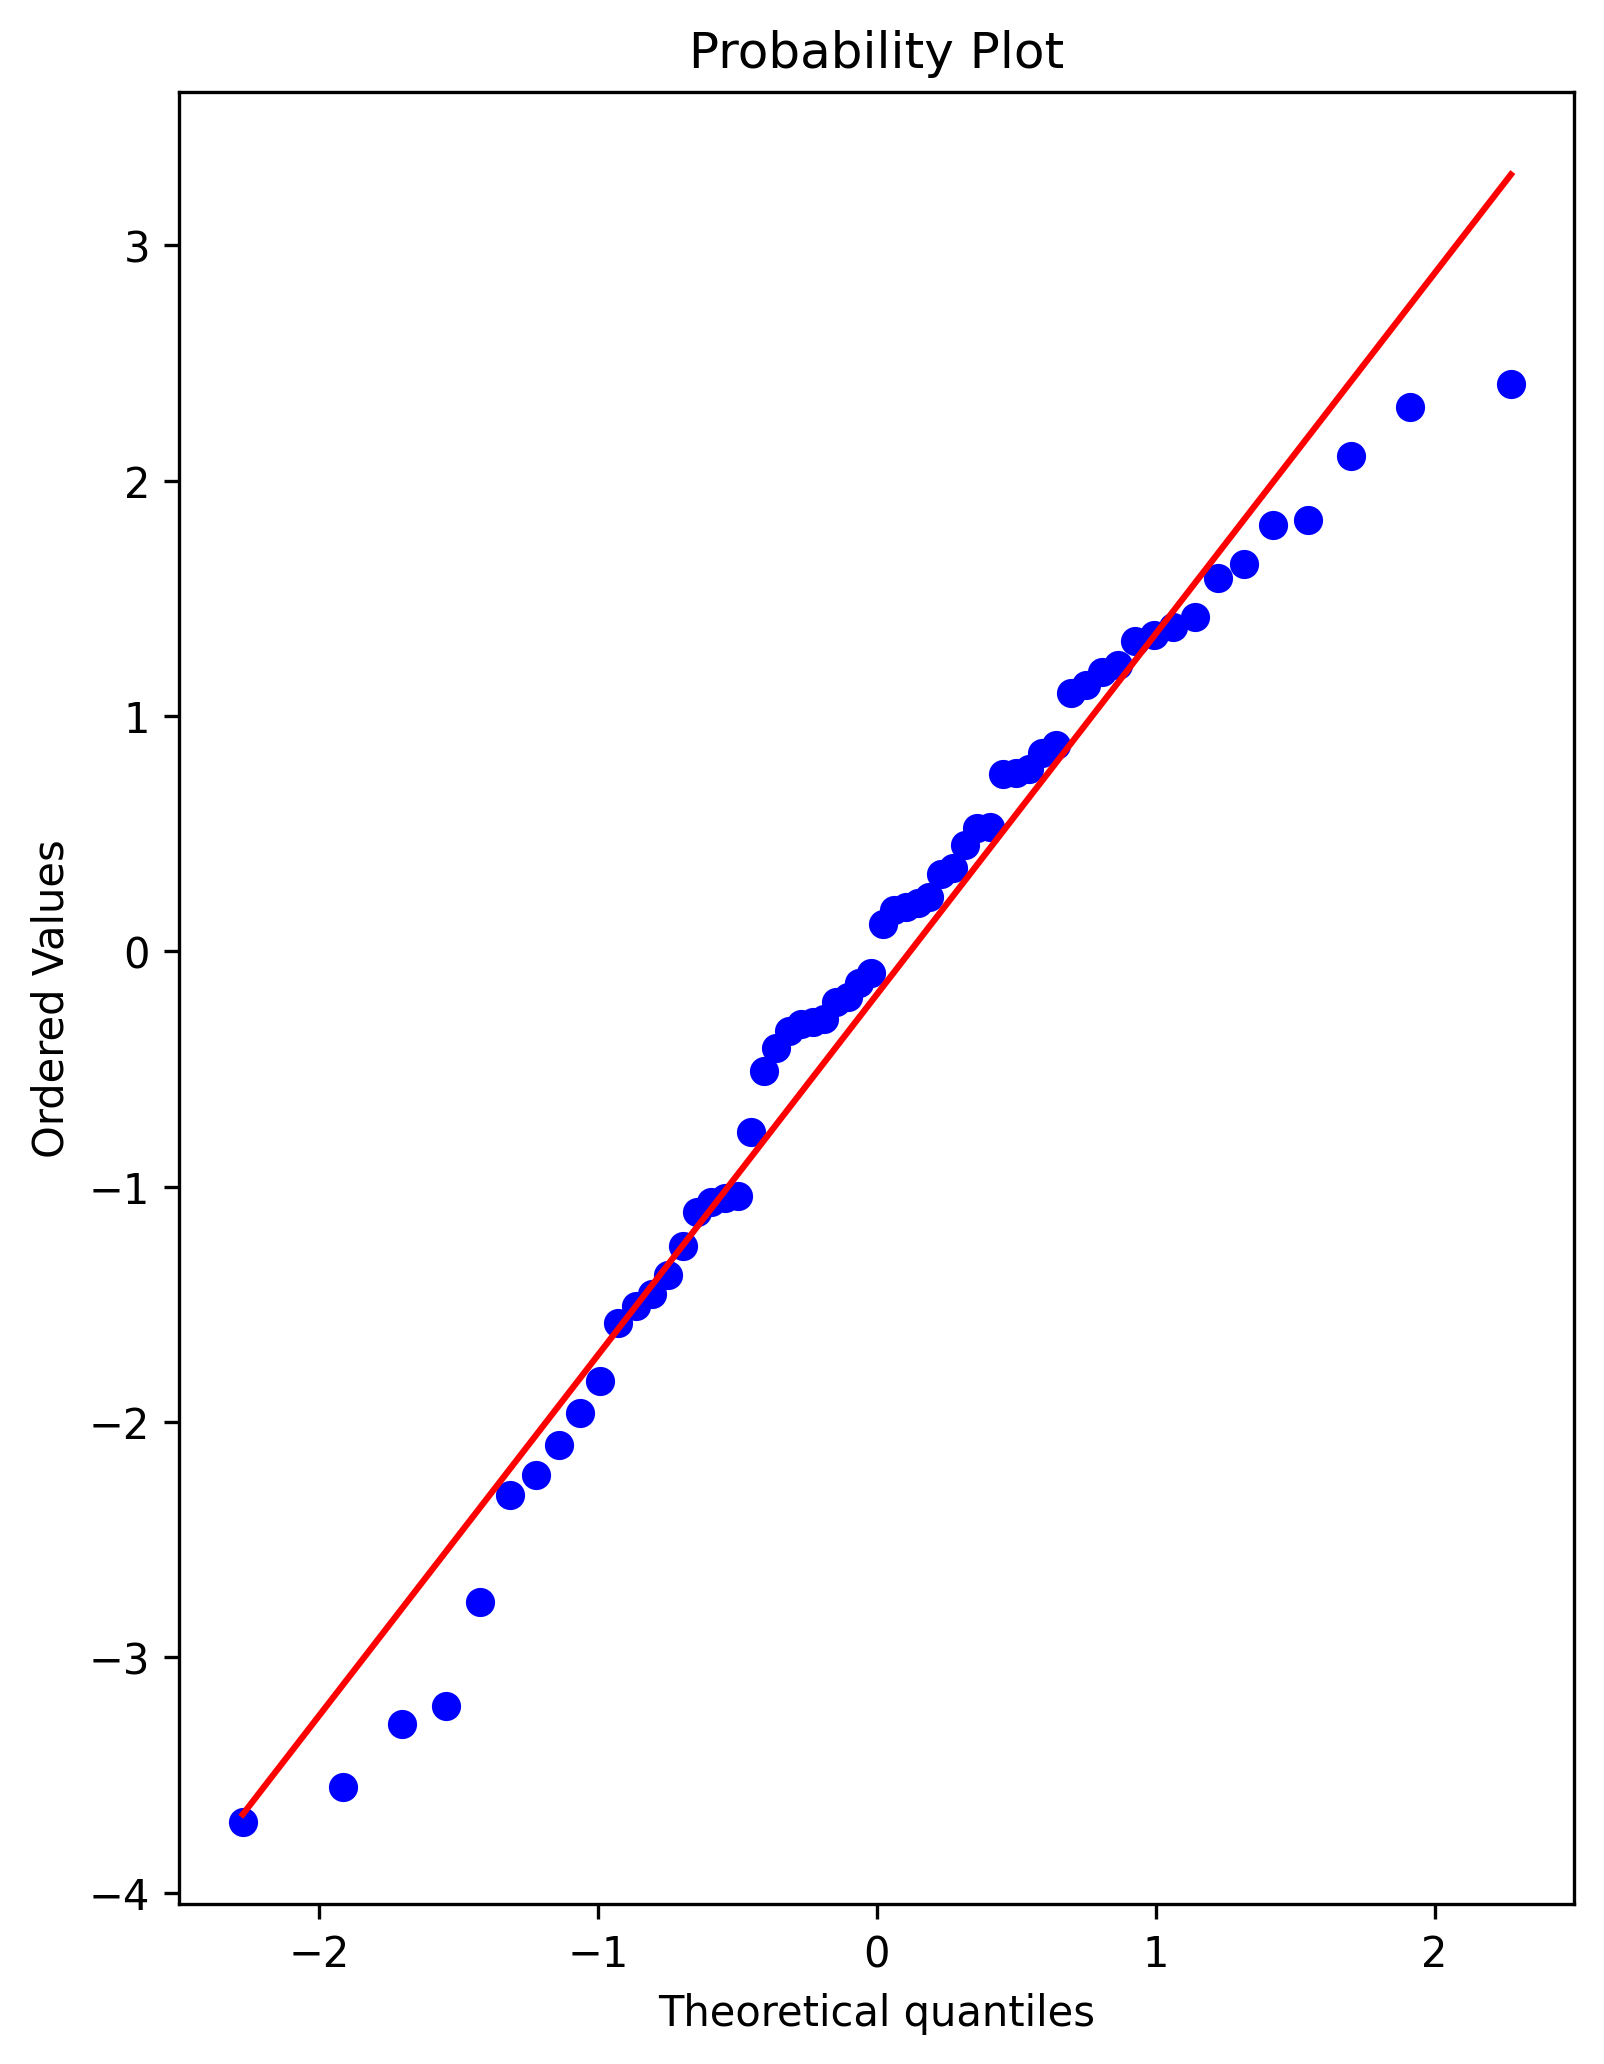

In [41]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8), dpi= 300)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these to _
_ = sp.stats.probplot(test_residuals, plot=ax)

* The red line is normal distribution
* The blue dots really diverge from this red line at either point

## Linear Regression - Model Deployment and Coefficient Interpretation
* Later on we will explore polynomial regression and regularization as model adjustments
* For now, let's focus on a simple "deployment" of our model by saving and loading it, then applying to new data


In [42]:
# Apply for the final model
final_model = LinearRegression()

In [43]:
# Apply to the real data, not X train, y train or X test, y test
final_model.fit(X,y)

LinearRegression()

In [44]:
# return back beta coefficient
# each of beta coefficient of each column in X dataset
# The results of the newspaper is seemed close to 0
# If it was a pure zero, that means regradless of what you spend on newspaper advertising, it completely cancels out any value that you spend on newspaper
# In fact it even lower your total sales
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [45]:
X.head()


,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


* Every 1 unit of TV spend will lead to increase 0.045 sale values
* Every 1 unit of Radio spend will lead to increase 0.189 sale values
* Every 1 unit of newspapers spend will lead to decrease -0.001 sale values



* Compare your regression prediction versus the true feature values

In [46]:
y_hat = final_model.predict(X)

Text(0.5, 1.0, 'Newspaper Spend')

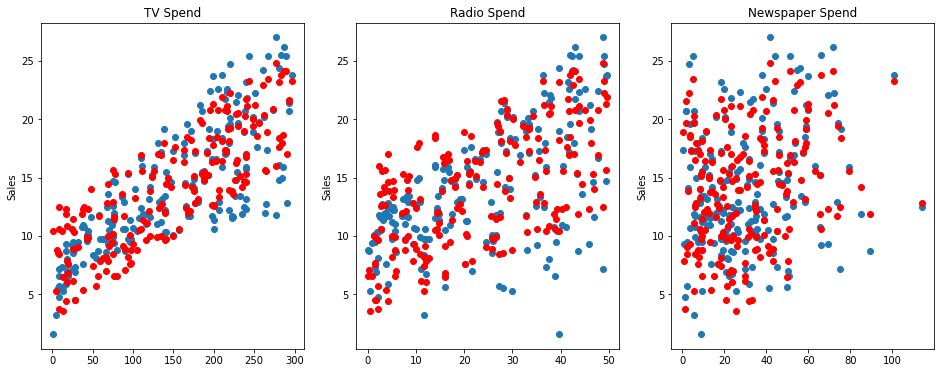

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))
axes[0].plot(df["TV"], df["sales"], "o") # real data point
axes[0].plot(df["TV"], y_hat, 'o', color="red") # predicted point
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df["radio"], df["sales"], "o") # real data point
axes[1].plot(df["radio"], y_hat, 'o', color="red") # predicted point
axes[1].set_ylabel("Sales")
axes[1].set_title("Radio Spend")

axes[2].plot(df["newspaper"], df["sales"], "o")  # real data point
axes[2].plot(df["newspaper"], y_hat, 'o', color="red") # predicted point
axes[2].set_ylabel("Sales")
axes[2].set_title("Newspaper Spend")

* <b>In reality, we need to normalize the number of each data column first before you even start training the model</b>
---
## Save and load the model

In [48]:
# using the dump (save) and load (load)
from joblib import dump, load


In [49]:
# save the model
dump(final_model, 'final_sales_model.joblib')

['final_sales_model.joblib']

In [50]:
# load the model
loaded_model = load("final_sales_model.joblib")

In [51]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [52]:
X.shape


(200, 3)

In [53]:
# 149 TV, 22 Radio, 12 Newspaper
# Sales?
campaign = [[149, 22, 12]]

In [54]:
loaded_model.predict(campaign)

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])